<a href="https://colab.research.google.com/github/mudathirmussa/FIRST-PROJECT/blob/main/brain_tumor__detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install tensorflow keras opencv-python matplotlib numpy pandas scikit-learn

#Impor Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Load and Preprocess Images

In [30]:
# Mount Google Drive (you'll need to upload the dataset to your Drive first)
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Path to dataset
dataset_path ="/content/drive/MyDrive/archive (1)"


# Define categories
categories = ['no', 'yes']  # 'no' for no tumor, 'yes' for tumor present

In [32]:
# Set image size
IMG_SIZE = 150

# Function to preprocess images
def preprocess_images():
    data = []
    for category in categories:
        path = os.path.join(dataset_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

# Preprocess all images
data = preprocess_images()

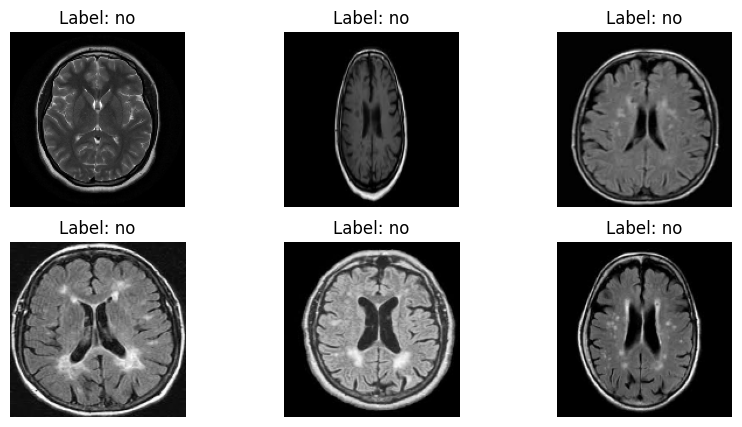

In [33]:
# Visualize some samples
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(data[i][0], cmap='gray')
    plt.title(f"Label: {categories[data[i][1]]}")
    plt.axis('off')
plt.show()

In [34]:
X = np.array([item[0] for item in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array([item[1] for item in data])

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [35]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Reduces overfitting
    Dense(2, activation='softmax')
])

In [36]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

In [37]:
# Convert grayscale (1 channel) to 3 channels
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

# Verify shape
print(X_train_rgb.shape)  # Should be (n_samples, 150, 150, 3)

(202, 150, 150, 3)


In [38]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    #callbacks=callbacks
)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - accuracy: 0.9962 - loss: 0.0570 - val_accuracy: 0.8627 - val_loss: 3.1567
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9914 - loss: 0.0309 - val_accuracy: 0.8824 - val_loss: 4.0213
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9848 - loss: 0.0749 - val_accuracy: 0.8627 - val_loss: 3.8350
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9785 - loss: 0.3060 - val_accuracy: 0.8627 - val_loss: 4.3016
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9973 - loss: 0.0349 - val_accuracy: 0.8627 - val_loss: 2.6779
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9962 - loss: 0.0281 - val_accuracy: 0.8824 - val_loss: 2.5855
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9912 - loss: 0.0300 - val_accuracy: 0.8431 - val_loss: 2.2008
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0102 - val_accuracy: 0.8431 - val_loss: 2.3838

[]


#Evaluate Performance


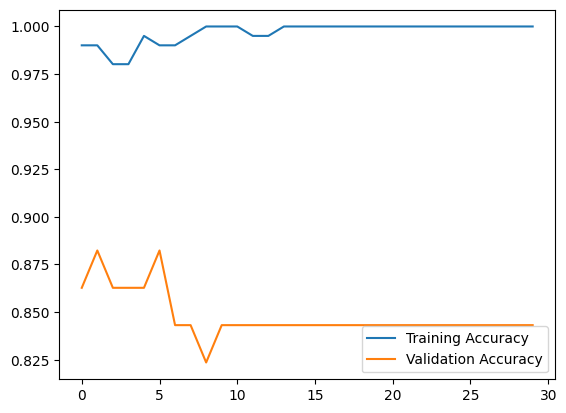

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8329 - loss: 3.9846
Test Accuracy: 84.31%


In [23]:
# Plot accuracy/loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Test on unseen data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

In [42]:
import os

# Navigate to your image's folder
os.chdir("/content/drive/MyDrive/archive (1)")  # Replace with your actual folder

# Verify the file exists
test_path = "/content/drive/MyDrive/archive (1)/no/1 no.jpeg"  # Replace with your filename
print(f"File exists: {os.path.exists(test_path)}")

File exists: True


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


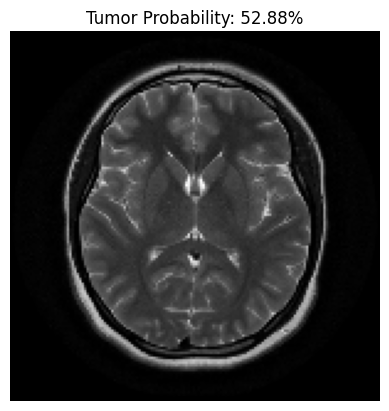

In [44]:
def predict_tumor(image_path):
    # Load the image, handling potential errors
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Could not load image at '{image_path}'")
        return  # Exit the function early if image loading failed

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    pred = model.predict(img)
    plt.imshow(img[0,:,:,0], cmap='gray')
    plt.title(f"Tumor Probability: {pred[0][1]*100:.2f}%")
    plt.axis('off')
    plt.show()

# Example usage with an existing image path
# Make sure to replace with your actual image path
predict_tumor("/content/drive/MyDrive/archive (1)/no/1 no.jpeg")

In [27]:
import os
test_path = "/path/to/your/test_mri.jpg"
print(f"File exists: {os.path.exists(test_path)}")  # Should print True

File exists: False
